# Light curve fit in sn_pipe

In [71]:
import yaml
from sn_fit.process_fit import Fitting
import h5py
from astropy.table import Table,vstack

## Simulation available

In [72]:
ls Output_Simu

LC_Simu_notebook_1.hdf5  Simu_Simu_notebook_1.hdf5


## Fitter configuration file

In [73]:
# load a generic yaml file
configFile = '../input/fit_sn/param_fit_gen.yaml'
config = yaml.load(open(configFile),Loader=yaml.FullLoader)

In [74]:
print(config)

{'ProductionID': 'prodidmain', 'Instrument': {'name': 'LSST', 'throughput_dir': 'LSST_THROUGHPUTS_BASELINE', 'atmos_dir': 'THROUGHPUTS_DIR', 'airmass': 1.1, 'atmos': True, 'aerosol': False}, 'Simulations': {'prodid': 'prodidsimu', 'dirname': 'dbDir'}, 'Fitter': {'name': 'sn_fitter.fit_fittername', 'model': 'salt2-extended', 'version': 1.0, 'covmb': 'covmbcalc'}, 'Display': 'displayval', 'Output': {'directory': 'outDir', 'save': True}, 'Multiprocessing': {'nproc': 'nnproc'}}


In [75]:
config['Multiprocessing']['nproc'] = 1
fitter = 'sn_cosmo'
config['Fitter']['name'] = 'sn_fitter.fit_{}'.format(fitter)
config['ProductionID'] = 'Simu_notebook_1_{}'.format(fitter)
config['Simulations']['prodid'] = 'Simu_notebook_1'
config['Simulations']['dirname'] = 'Output_Simu'
config['Output']['directory'] = 'Output_Fit'
config['Fitter']['covmb'] = 0
config['Display'] = 0
print(config)

{'ProductionID': 'Simu_notebook_1_sn_cosmo', 'Instrument': {'name': 'LSST', 'throughput_dir': 'LSST_THROUGHPUTS_BASELINE', 'atmos_dir': 'THROUGHPUTS_DIR', 'airmass': 1.1, 'atmos': True, 'aerosol': False}, 'Simulations': {'prodid': 'Simu_notebook_1', 'dirname': 'Output_Simu'}, 'Fitter': {'name': 'sn_fitter.fit_sn_cosmo', 'model': 'salt2-extended', 'version': 1.0, 'covmb': 0}, 'Display': 0, 'Output': {'directory': 'Output_Fit', 'save': True}, 'Multiprocessing': {'nproc': 1}}


## Fitter instance

In [76]:
fit = Fitting(config)

## grab simulations

In [77]:
dirSimu = config['Simulations']['dirname']
prodidSimu = config['Simulations']['prodid']
simu_name = '{}/Simu_{}.hdf5'.format(dirSimu, prodidSimu)
lc_name = '{}/LC_{}.hdf5'.format(dirSimu, prodidSimu)

 # getting the simu file
f = h5py.File(simu_name, 'r')
print(f.keys())
# reading the simu file - load it in simu Table
simu = Table()
for i, key in enumerate(f.keys()):
    simu = vstack([simu, Table.read(simu_name, path=key)])

<KeysViewHDF5 ['summary_27238', 'summary_27239', 'summary_27244', 'summary_27246', 'summary_27247', 'summary_27248', 'summary_27250', 'summary_27251', 'summary_27257', 'summary_27259', 'summary_27260', 'summary_27262', 'summary_27333', 'summary_27344', 'summary_27345', 'summary_27346', 'summary_27347', 'summary_27348']>


In [78]:
simu

SNID,index_hdf5,season,fieldname,fieldid,n_lc_points,area,RA,Dec,x0,epsilon_x0,x1,epsilon_x1,color,epsilon_color,daymax,epsilon_daymax,z,survey_area,healpixID,pixRA,pixDec,dL,ptime,snr_fluxsec_meth,status,ebvofMW
int64,bytes32,int64,bytes7,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,bytes6,int64,float64
11,27238_0.0_0.0_0.01_60304.516_2_0,2,unknown,0,3,0.8392936452111668,149.85487384084092,1.6498072544297169,0.04344672801414293,0.0,0.0,0.0,0.0,0.0,60304.51639537523,0.0,0.01,0.8392936452111668,27238,149.765625,0.0,41959.39520882315,0.0269010066986084,interp,1,0.06879208981990814
12,27238_0.0_0.0_0.06_60305.566_2_0,2,unknown,0,3,0.8392936452111668,149.85487384084092,1.6498072544297169,0.001121177351228438,0.0,0.0,0.0,0.0,0.0,60305.56639537523,0.0,0.060000000000000005,0.8392936452111668,27238,149.765625,0.0,261198.45234659043,0.022103309631347656,interp,1,0.06879208981990814
13,27238_0.0_0.0_0.11_60306.616_2_0,2,unknown,0,4,0.8392936452111668,149.85487384084092,1.6498072544297169,0.0003114824072048303,0.0,0.0,0.0,0.0,0.0,60306.616395375226,0.0,0.11,0.8392936452111668,27238,149.765625,0.0,495554.01158879057,0.025623559951782227,interp,1,0.06879208981990814
14,27238_0.0_0.0_0.16_60307.666_2_0,2,unknown,0,4,0.8392936452111668,149.85487384084092,1.6498072544297169,0.00013811596299846755,0.0,0.0,0.0,0.0,0.0,60307.66639537523,0.0,0.16000000000000003,0.8392936452111668,27238,149.765625,0.0,744193.4091514976,0.025452852249145508,interp,1,0.06879208981990814
15,27238_0.0_0.0_0.21_60308.716_2_0,2,unknown,0,4,0.8392936452111668,149.85487384084092,1.6498072544297169,7.553621344328767e-05,0.0,0.0,0.0,0.0,0.0,60308.71639537523,0.0,0.21000000000000002,0.8392936452111668,27238,149.765625,0.0,1006306.2087165633,0.02522587776184082,interp,1,0.06879208981990814
16,27238_0.0_0.0_0.26_60309.766_2_0,2,unknown,0,8,0.8392936452111668,149.85487384084092,1.6498072544297169,4.660609865742379e-05,0.0,0.0,0.0,0.0,0.0,60309.76639537523,0.0,0.26,0.8392936452111668,27238,149.765625,0.0,1281109.885184664,0.02809739112854004,interp,1,0.06879208981990814
17,27238_0.0_0.0_0.31_60310.816_2_0,2,unknown,0,6,0.8392936452111668,149.85487384084092,1.6498072544297169,3.111746155309422e-05,0.0,0.0,0.0,0.0,0.0,60310.81639537523,0.0,0.31000000000000005,0.8392936452111668,27238,149.765625,0.0,1567854.210121077,0.025278329849243164,interp,1,0.06879208981990814
18,27238_0.0_0.0_0.36_60311.866_2_0,2,unknown,0,6,0.8392936452111668,149.85487384084092,1.6498072544297169,2.197222182905808e-05,0.0,0.0,0.0,0.0,0.0,60311.866395375226,0.0,0.36000000000000004,0.8392936452111668,27238,149.765625,0.0,1865824.4072286398,0.025153636932373047,interp,1,0.06879208981990814
19,27238_0.0_0.0_0.41_60312.916_2_0,2,unknown,0,6,0.8392936452111668,149.85487384084092,1.6498072544297169,1.6179285154222726e-05,0.0,0.0,0.0,0.0,0.0,60312.91639537523,0.0,0.41000000000000003,0.8392936452111668,27238,149.765625,0.0,2174343.1906589023,0.025636672973632812,interp,1,0.06879208981990814


## Loop on LC simulation and fit

In [79]:
print('Number of LCs',len(simu))
fitres = Table()
for i,val in enumerate(simu):
    lc = None
    lc = Table.read(lc_name, path='lc_{}'.format(val['index_hdf5']))
    lc.convert_bytestring_to_unicode()
    if val['status'] == 1:
        res = fit(lc)
        fitres = vstack([fitres, res])
    #if i>=20:
    #    break

Number of LCs 805


In [80]:
fitres

Dec,RA,color,dL,daymax,ebvofMW,epsilon_color,epsilon_daymax,epsilon_x0,epsilon_x1,healpixID,pixDec,pixRA,ptime,season,snr_fluxsec_meth,status,survey_area,x0,x1,z,z_fit,Cov_t0t0,Cov_t0x0,Cov_t0x1,Cov_t0color,Cov_x0x0,Cov_x0x1,Cov_x0color,Cov_x1x1,Cov_x1color,Cov_colorcolor,t0_fit,x0_fit,x1_fit,color_fit,mbfit,fitstatus,phase_min,phase_max,N_bef,N_aft,N_bef_u,N_aft_u,SNR_u,N_bef_g,N_aft_g,SNR_g,N_bef_r,N_aft_r,SNR_r,N_bef_i,N_aft_i,SNR_i,N_bef_z,N_aft_z,SNR_z,N_bef_y,N_aft_y,SNR_y
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,str6,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,float64,int64,int64,float64,int64,int64,float64,int64,int64,float64
1.6498072544297169,149.85487384084092,0.0,41959.39520882315,60304.51639537523,0.06879208981990814,0.0,0.0,0.0,0.0,27238,0.0,149.765625,0.0269010066986084,2,interp,1,0.8392936452111668,0.04344672801414293,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,59733.92684399359,59733.932951896,0,3,0,0,0,0,1,2166.284430722683,0,1,4291.284866614036,0,1,4772.2382926023365,0,0,0.0,0,0,0.0
1.6498072544297169,149.85487384084092,0.0,261198.45234659043,60305.56639537523,0.06879208981990814,0.0,0.0,0.0,0.0,27238,0.0,149.765625,0.022103309631347656,2,interp,1,0.8392936452111668,0.001121177351228438,0.0,0.060000000000000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,56916.288785314646,56916.29460510845,0,3,0,0,0,0,1,172.6295379027738,0,1,477.95637466168137,0,1,530.9352055426606,0,0,0.0,0,0,0.0
1.6498072544297169,149.85487384084092,0.0,495554.01158879057,60306.616395375226,0.06879208981990814,0.0,0.0,0.0,0.0,27238,0.0,149.765625,0.025623559951782227,2,interp,1,0.8392936452111668,0.0003114824072048303,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,54333.56741827072,54352.497550824286,0,4,0,0,0,0,1,56.85673176696369,0,1,159.62663744678193,0,1,199.51771488563392,0,1,200.39763432860397,0,0,0.0
1.6498072544297169,149.85487384084092,0.0,744193.4091514976,60307.66639537523,0.06879208981990814,0.0,0.0,0.0,0.0,27238,0.0,149.765625,0.025452852249145508,2,interp,1,0.8392936452111668,0.00013811596299846755,0.0,0.16000000000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,51991.603305414224,52009.717483978406,0,4,0,0,0,0,1,26.93737940252778,0,1,81.12941447181795,0,1,101.47530864770619,0,1,119.46162066751651,0,0,0.0
1.6498072544297169,149.85487384084092,0.0,1006306.2087165633,60308.71639537523,0.06879208981990814,0.0,0.0,0.0,0.0,27238,0.0,149.765625,0.02522587776184082,2,interp,1,0.8392936452111668,7.553621344328767e-05,0.0,0.21000000000000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,49843.18994568637,49860.55560447517,0,4,0,0,0,0,1,14.6233920571512,0,1,48.55774787799286,0,1,67.07664331647736,0,1,80.10451375212246,0,0,0.0
1.6498072544297169,149.85487384084092,0.0,1281109.885184664,60309.76639537523,0.06879208981990814,0.0,0.0,0.0,0.0,27238,0.0,149.765625,0.02809739112854004,2,interp,1,0.8392936452111668,4.660609865742379e-05,0.0,0.26,0.26,1.4455165810414508,-3.770061018050542e-06,-0.09046143801996492,0.05701246818501893,2.5869840463636044e-11,-1.6351404653366608e-06,-4.3509648785826766e-07,0.2562810236921203,0.03010303474784126,0.007427696777108999,60309.734347909325,3.8398273397455215e-05,-0.0334081646255015,0.05130640639165825,21.64287227403616,fitok,0.41705267554096365,49.54869521870499,0,8,0,0,0,0,2,9.830903503053438,0,2,33.519693154845456,0,2,48.31107042623194,0,1,61.871746255872075,0,1,10.939787705919617
1.6498072544297169,149.85487384084092,0.0,1567854.210121077,60310.81639537523,0.06879208981990814,0.0,0.0,0.0,0.0,27238,0.0,149.765625,0.025278329849243164,2,interp,1,0.8392936452111668,3.1117461553094

In [81]:
fit.dump(fitres,0) # saving data on disk

In [82]:
ls Output_Fit

Fit_Simu_notebook_1_sn_cosmo.hdf5


## Display fit results

### load file from fit

In [83]:
fit_name = '{}/Fit_{}.hdf5'.format(config['Output']['directory'],config['ProductionID'])
f = h5py.File(fit_name, 'r')
print(f.keys())
# reading the fit file - load it in fit table
fittab = Table()
for i, key in enumerate(f.keys()):
    fittab = vstack([fittab, Table.read(fit_name, path=key)])

<KeysViewHDF5 ['fit_lc_0']>


<IPython.core.display.Javascript object>


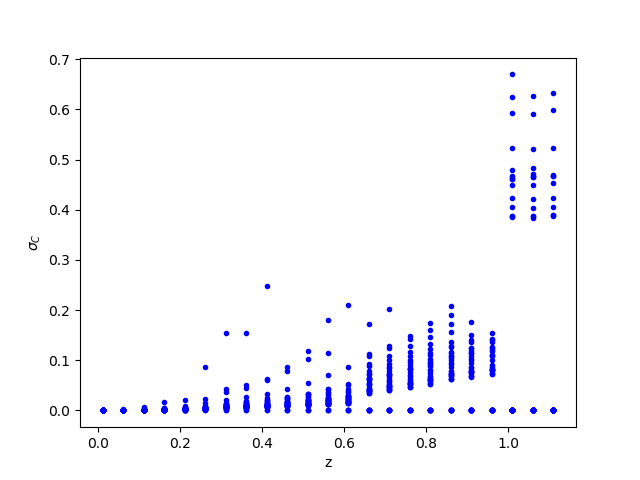

Text(0, 0.5, '$\\sigma_C$')

In [84]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np

# example: display error on the color vs z
fig, ax = plt.subplots()

ax.plot(fittab['z'],np.sqrt(fittab['Cov_colorcolor']),'b.')
ax.set_xlabel('z')
ax.set_ylabel('$\sigma_C$')